## Importing packages

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
df = pd.read_excel("./ToyotaCorolla.xls", "data", index_col=0)
# df.head()

## One-hot Encoding


In [163]:
one_hot_columns = ["Fuel_Type", "Color"]
for column in one_hot_columns:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies
df.drop(columns=one_hot_columns, inplace=True)

In [164]:
df.drop(columns=["Model"], inplace=True)
df.shape

(1436, 48)

## Normalization

In [165]:
# MinMax Normalization for better performance
df = (df - df.min()) / (df.max() - df.min())

In [166]:
df.isna().sum()

Price                   0
Age_08_04               0
Mfg_Month               0
Mfg_Year                0
KM                      0
HP                      0
Met_Color               0
Automatic               0
CC                      0
Doors                   0
Cylinders            1436
Gears                   0
Quarterly_Tax           0
Weight                  0
Mfr_Guarantee           0
BOVAG_Guarantee         0
Guarantee_Period        0
ABS                     0
Airbag_1                0
Airbag_2                0
Airco                   0
Automatic_airco         0
Boardcomputer           0
CD_Player               0
Central_Lock            0
Powered_Windows         0
Power_Steering          0
Radio                   0
Mistlamps               0
Sport_Model             0
Backseat_Divider        0
Metallic_Rim            0
Radio_cassette          0
Parking_Assistant       0
Tow_Bar                 0
CNG                     0
Diesel                  0
Petrol                  0
Beige       

In [167]:
df.fillna(0, inplace=True)

In [168]:
df.isna().sum()

Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
HP                   0
Met_Color            0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
CNG                  0
Diesel               0
Petrol               0
Beige                0
Black                0
Blue                 0
Green                0
Grey                 0
Red        

In [169]:
def train_validation_test_split(df, train_size, validation_size, test_size):
    train = df.sample(frac=train_size, random_state=0)
    df.drop(train.index, inplace=True)
    print("train_size:", train.shape)
    validation_size = (validation_size) / (validation_size + test_size)
    validation = df.sample(frac=validation_size, random_state=0)
    df.drop(validation.index, inplace=True)
    print("validation_size:", validation.shape)
    test = df
    print("test_size:", test.shape)
    return train, validation, test

In [170]:
train_size, validation_size, test_size = 0.7, 0.15, 0.15
train, validation, test = train_validation_test_split(df.copy(), train_size, validation_size, test_size)

train_size: (1005, 48)
validation_size: (216, 48)
test_size: (215, 48)


In [171]:
y_train = train["Price"].to_numpy()
X_train = train.drop("Price", axis=1).to_numpy()

y_validation = validation["Price"].to_numpy()
X_validation = validation.drop("Price", axis=1).to_numpy()

y_test = test["Price"].to_numpy()
X_test = test.drop("Price", axis=1).to_numpy()

## 1. Stochastic Gradient Descent

$$
w^{i +1} = w^{i} + \eta(t_n - w^{(i)T} \phi_n)\phi_n
$$

In [191]:
def SGD(X_train, y_train, X_validation, y_validation, X_test, y_test, eta, batch_size, iterations):
    w = np.zeros(X_train.shape[1])
    train_loss, validation_loss, test_loss = list(), list(), list()
    
    for _ in range(iterations):
        indices = np.random.choice(X_train.shape[0], batch_size, replace=False)
        selected_X_train = X_train[indices]
        selected_y_train = y_train[indices]
        train_SSE = (np.sum(selected_y_train - selected_X_train.dot(w))**2)/2
        validation_SSE = (np.sum(y_validation - X_validation.dot(w))**2)/2
        test_SSE = (np.sum(y_test - X_test.dot(w))**2)/2
        train_loss.append(train_SSE)
        validation_loss.append(validation_SSE)
        test_loss.append(test_SSE)
        w += eta * (selected_y_train - selected_X_train.dot(w)).dot(selected_X_train)
    return train_loss, validation_loss, test_loss

# SGD(X_train, y_train, X_validation, y_validation, X_test, y_test, 0.001, 250, 500)

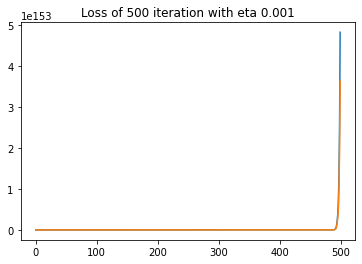

In [193]:
def plotting(train_loss, validation_loss, iteration, eta):
    plt.plot(train_loss)
    plt.plot(validation_loss)
    plt.title("Loss of {} iteration with eta {}".format(iteration, eta))
    plt.show()

iterations = np.arange(50, 500, 50)
etas = np.arange(0.0001, 0.001, 0.0001)
train_loss, validation_loss, test_loss = SGD(X_train, y_train, X_validation, y_validation, X_test, y_test, 0.001, 250, 500)
plotting(train_loss, validation_loss, 500, 0.001)
